# Рекомендательная система. Отчёт

## Постановка задачи

**На вход:** История пользовательских покупок, информация о пользователе, информация о продуктах

**На выход:** Рекомендация того, что человек купит в следующий раз

Реализовать несколько методов рекомендательной системы продуктов
* baseline - global top
* ALS
* item-to-item
* user-to-user



Метрика - MAP30

## Данные

### Products


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>product_id</th>
      <th>level_1</th>
      <th>level_2</th>
      <th>level_3</th>
      <th>level_4</th>
      <th>segment_id</th>
      <th>brand_id</th>
      <th>vendor_id</th>
      <th>netto</th>
      <th>is_own_trademark</th>
      <th>is_alcohol</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0003020d3c</td>
      <td>c3d3a8e8c6</td>
      <td>c2a3ea8d5e</td>
      <td>b7cda0ec0c</td>
      <td>6376f2a852</td>
      <td>123.0</td>
      <td>394a54a7c1</td>
      <td>9eaff48661</td>
      <td>0.400</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0003870676</td>
      <td>e344ab2e71</td>
      <td>52f13dac0c</td>
      <td>d3cfe81323</td>
      <td>6dc544533f</td>
      <td>105.0</td>
      <td>acd3dd483f</td>
      <td>10486c3cf0</td>
      <td>0.680</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0003ceaf69</td>
      <td>c3d3a8e8c6</td>
      <td>f2333c90fb</td>
      <td>419bc5b424</td>
      <td>f6148afbc0</td>
      <td>271.0</td>
      <td>f597581079</td>
      <td>764e660dda</td>
      <td>0.500</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>000701e093</td>
      <td>ec62ce61e3</td>
      <td>4202626fcb</td>
      <td>88a515c084</td>
      <td>48cf3d488f</td>
      <td>172.0</td>
      <td>54a90fe769</td>
      <td>03c2d70bad</td>
      <td>0.112</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0007149564</td>
      <td>e344ab2e71</td>
      <td>52f13dac0c</td>
      <td>d3cfe81323</td>
      <td>6dc544533f</td>
      <td>105.0</td>
      <td>63417fe1f3</td>
      <td>f329130198</td>
      <td>0.600</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
</div>




```python
len(product_df) == 43038
```




    

    

### Clients


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>client_id</th>
      <th>first_issue_date</th>
      <th>first_redeem_date</th>
      <th>age</th>
      <th>gender</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>000012768d</td>
      <td>2017-08-05 15:40:48</td>
      <td>2018-01-04 19:30:07</td>
      <td>45</td>
      <td>U</td>
    </tr>
    <tr>
      <th>1</th>
      <td>000036f903</td>
      <td>2017-04-10 13:54:23</td>
      <td>2017-04-23 12:37:56</td>
      <td>72</td>
      <td>F</td>
    </tr>
    <tr>
      <th>2</th>
      <td>000048b7a6</td>
      <td>2018-12-15 13:33:11</td>
      <td>NaN</td>
      <td>68</td>
      <td>F</td>
    </tr>
    <tr>
      <th>3</th>
      <td>000073194a</td>
      <td>2017-05-23 12:56:14</td>
      <td>2017-11-24 11:18:01</td>
      <td>60</td>
      <td>F</td>
    </tr>
    <tr>
      <th>4</th>
      <td>00007c7133</td>
      <td>2017-05-22 16:17:08</td>
      <td>2018-12-31 17:17:33</td>
      <td>67</td>
      <td>U</td>
    </tr>
  </tbody>
</table>
</div>



```python
len(client_df) == 400162
```






### Purchases



<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>client_id</th>
      <th>transaction_id</th>
      <th>transaction_datetime</th>
      <th>regular_points_received</th>
      <th>express_points_received</th>
      <th>regular_points_spent</th>
      <th>express_points_spent</th>
      <th>purchase_sum</th>
      <th>store_id</th>
      <th>product_id</th>
      <th>product_quantity</th>
      <th>trn_sum_from_iss</th>
      <th>trn_sum_from_red</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>000012768d</td>
      <td>7e3e2e3984</td>
      <td>2018-12-01 07:12:45</td>
      <td>10.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1007.0</td>
      <td>54a4a11a29</td>
      <td>9a80204f78</td>
      <td>2.0</td>
      <td>80.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1</th>
      <td>000012768d</td>
      <td>7e3e2e3984</td>
      <td>2018-12-01 07:12:45</td>
      <td>10.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1007.0</td>
      <td>54a4a11a29</td>
      <td>da89ebd374</td>
      <td>1.0</td>
      <td>65.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2</th>
      <td>000012768d</td>
      <td>7e3e2e3984</td>
      <td>2018-12-01 07:12:45</td>
      <td>10.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1007.0</td>
      <td>54a4a11a29</td>
      <td>0a95e1151d</td>
      <td>1.0</td>
      <td>24.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>3</th>
      <td>000012768d</td>
      <td>7e3e2e3984</td>
      <td>2018-12-01 07:12:45</td>
      <td>10.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1007.0</td>
      <td>54a4a11a29</td>
      <td>4055b15e4a</td>
      <td>2.0</td>
      <td>50.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>4</th>
      <td>000012768d</td>
      <td>7e3e2e3984</td>
      <td>2018-12-01 07:12:45</td>
      <td>10.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1007.0</td>
      <td>54a4a11a29</td>
      <td>a685f1916b</td>
      <td>1.0</td>
      <td>22.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>95</th>
      <td>000036f903</td>
      <td>0a3d640bf4</td>
      <td>2018-12-21 11:08:58</td>
      <td>7.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>700.0</td>
      <td>3c6c3b17f2</td>
      <td>ac81544ebc</td>
      <td>1.0</td>
      <td>20.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>96</th>
      <td>000036f903</td>
      <td>5b3e8ddbdd</td>
      <td>2018-12-23 09:59:01</td>
      <td>1.4</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>290.0</td>
      <td>6381a55c22</td>
      <td>746d395a83</td>
      <td>1.0</td>
      <td>58.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>97</th>
      <td>000036f903</td>
      <td>5b3e8ddbdd</td>
      <td>2018-12-23 09:59:01</td>
      <td>1.4</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>290.0</td>
      <td>6381a55c22</td>
      <td>3e038662c0</td>
      <td>1.0</td>
      <td>45.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>98</th>
      <td>000036f903</td>
      <td>5b3e8ddbdd</td>
      <td>2018-12-23 09:59:01</td>
      <td>1.4</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>290.0</td>
      <td>6381a55c22</td>
      <td>f5e18af323</td>
      <td>1.0</td>
      <td>67.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>99</th>
      <td>000036f903</td>
      <td>5b3e8ddbdd</td>
      <td>2018-12-23 09:59:01</td>
      <td>1.4</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>290.0</td>
      <td>6381a55c22</td>
      <td>0f0c1288d3</td>
      <td>1.0</td>
      <td>120.0</td>
      <td>NaN</td>
    </tr>
  </tbody>
</table>
<p>100 rows × 13 columns</p>
</div>

## Обработка данных 

### Json

Важно, что в файле с покупками данные об одном пользовате идут подряд. Используя этот факт, соберём всю информацию о покупках конкретного человека в один json вида:

    dict_keys(['age', 'gender', 'client_id', 'transaction_history', 'target'])

    {
      "age": 60,
      "gender": "F",
      "client_id": "000073194a",
      "transaction_history": [
        {
          "tid": "6e3215aca5",
          "datetime": "2018-11-25 10:56:20",
          "products": [
            {
              "product_id": "212f305c8b",
              "quantity": 2.0,
              "s": 447.0,
              "r": "0"
            },
            {
              "product_id": "2224fd78f2",
              "quantity": 2.0,
              "s": 33.0,
              "r": "0"
            }
          ],
          "rpr": 0.3,
          "epr": 0.0,
          "rps": 0.0,
          "eps": 0.0,
          "sum": 479.0,
          "store_id": "9e8fcd116d"
        },
        {
          "tid": "1d82d2ee6b",
          "datetime": "2018-12-08 10:07:33",
          "products": [
            {
              "product_id": "d6377ed635",
              "quantity": 1.0,
              "s": 29.0,
              "r": "0"
            },
            {
              "product_id": "4009f09b04",
              "quantity": 1.0,
              "s": 5.0,
              "r": "0"
            },
            {
              "product_id": "113e3ace79",
              "quantity": 7.0,
              "s": 180.0,
              "r": "0"
            }
          ],
          "rpr": 1.0,
          "epr": 0.0,
          "rps": 0.0,
          "eps": 0.0,
          "sum": 214.1,
          "store_id": "9e8fcd116d"
        },
      ],
      "target": [
        {
          "tid": "e93494ad1f",
          "datetime": "2019-03-16 09:41:21",
          "product_ids": [
            "6fbcfd9373",
            "0a4cfd2c86",
            "5a541d7e46"
          ],
          "store_id": "9e8fcd116d"
        }
      ]
    }
    

где сначала указана информация о самом пользователе, потом история его покупок со служебной информацией, а затем **целевая переменная**: то, что пользователь купит в следующий раз

Кроме того, данные пошардированы - исходный файл (5Gb Размером) разбит на несколько (7) json, чтобы данные можно было использовать "кусочками"

### Train valid data

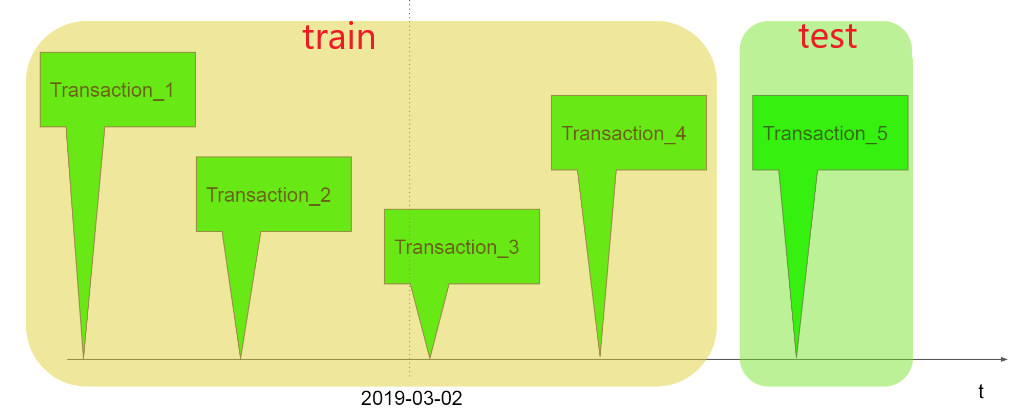

## Метрика

<code>[Теория](https://habr.com/ru/companies/econtenta/articles/303458/#:~:text=%D0%A0%D0%B0%D1%81%D1%81%D0%BC%D0%BE%D1%82%D1%80%D0%B8%D0%BC%20%D0%BE%D1%81%D0%BD%D0%BE%D0%B2%D0%BD%D1%8B%D0%B5%20%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%BA%D0%B8.-,Mean,-average%20precision)
</code>

nMap - нормальзиванный Mean average precision на 30 объектах

### Precision at K

Precision at K (p@K) — точность на K элементах — базовая метрика качества ранжирования для одного объекта. Допустим, наш алгоритм ранжирования выдал оценки релевантности для каждого элемента ${r(e)}_{e\in K}$. Отобрав среди них первые $K < M$ элементов с наибольшим ${r(e)}$ можно посчитать долю релевантных. Именно это и делает precision at K:

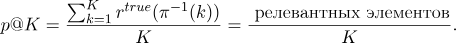


Замечание: под $\pi ^{-1}(k)$ понимается элемент $e \in E$, который в результате перестановки $\pi$ оказался на $k$-ой позиции. Так, $\pi ^{-1}(1)$ — элемент с наибольшим ${r(e)}$, $\pi ^{-1}(2)$ — элемент со вторым по величине ${r(e)}$ и так далее.


### Average precision at K

Precision at K — метрика простая для понимания и реализации, но имеет важный недостаток — она не учитывает порядок элементов в «топе». Так, если из десяти элементов мы угадали только один, то не важно на каком месте он был: на первом, или на последнем, — в любом случае $p@10 = 0.1$. При этом очевидно, что первый вариант гораздо лучше.

Этот недостаток нивелирует метрика ранжирования average precision at K (ap@K), которая равна сумме p@k по индексам k от 1 до K только для релевантных элементов, деленому на K:

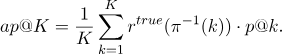

Так, 

* если из трех элементов мы релевантным оказался только находящийся на последнем месте, то $ap@3 = \frac{1}{3}(0 + 0 + \frac{1}{3}) \approx 0.11$, 

* если угадали лишь тот, что был на первом месте, то $ap@3 = \frac{1}{3}(\frac{1}{3} + 0 + 0) \approx 0.33$, 

* а если угаданы были все, то $ap@3 = \frac{1}{3}(\frac{1}{1} + \frac{2}{2} + \frac{3}{3}) \approx 1$.


### Mean average precision at K

Mean average precision at K (map@K) — одна из наиболее часто используемых метрик качества ранжирования. В p@K и ap@K качество ранжирования оценивается для отдельно взятого объекта (пользователя, поискового запроса). На практике объектов множество: мы имеем дело с сотнями тысяч пользователей, миллионами поисковых запросов и т.д. Идея map@K заключается в том, чтобы посчитать ap@K для каждого объекта и усреднить:

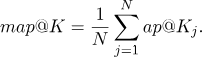

## Решение

### Global top

Идея проста - взять топ 30 самых покупаемых товаров и предлагать их каждому пользователю независимо от его истории

количество топ-1 товара: 

    cnt['4009f09b04'] == 766595

топ-2: 

    cnt['15ccaa8685'] == 266330

Вычисляем метрику:

In [ ]:
scores = []
for js in tqdm((json.loads(s) for s in open(get_shard_path(7)))):
    recommended_items = top_products[:30]
    gt_items = js["target"][0]["product_ids"]
    ap = normalized_average_precision(gt_items, recommended_items)
    scores.append(ap)
np.mean(scores)

Итог

    результат по метрике - 0.06490413817015536

    скорость - 4738.11it/s

### Отступление

In [ ]:
def make_coo_row(transaction_history, product_encoder: ProductEncoder):
    idx = []
    values = []

    items = []
    for trans in transaction_history:
        items.extend([i["product_id"] for i in trans["products"]])
    n_items = len(items)

    for pid in items:
        idx.append(product_encoder.toIdx(pid))
        values.append(1.0 / n_items)

    return sp.coo_matrix(
        (np.array(values).astype(np.float64), ([0] * len(idx), idx)), shape=(1, product_encoder.num_products),
    )

Функция, которая по истории покупок пользователя и product_encoder (создан для формирования id продуктов) собирает строку матрицы.

Строка матрицы содержит отнормированную сумму всех продуктов пользователя

        values.append(1.0 / n_items)

тут мы стремимся получить некоторое распредление

1. `np.array(values).astype(np.float32)`: Значения элементов матрицы в формате массива NumPy, приведенные к типу данных np.float32.
2. `([0] * len(idx), idx)`: Кортеж, содержащий два массива. Первый массив состоит из нулей, повторенных len(idx) раз. Второй массив содержит индексы ненулевых элементов в матрице.
3. `shape=(1, product_encoder.num_products)`: Форма (размерность) матрицы, указанная в виде кортежа, где первый элемент соответствует количеству строк матрицы (в данном случае 1), а второй элемент - количеству столбцов матрицы (product_encoder.num_products).

### ALS

<code>[Теория](https://habr.com/ru/companies/flexitech_ai/articles/760620/#:~:text=%D1%81%C2%A0%D0%BD%D0%B5%D0%BF%D0%BE%D0%BB%D0%BD%D1%8B%D0%BC%D0%B8%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8.-,%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5,-%D0%BF%D0%BE%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D0%B5%D0%B9%20%D1%81)
</code>

Собираем X_sparse матрицу: 

    <183938x43038 sparse matrix of type '<class 'numpy.float32'>' 
        with 12918657 stored elements in Compressed Sparse Row format>
    

В чём её перелесть? Она могла бы быть размером:

In [5]:
183938 * 43038

7916323644

но по факту в ней содержится 12918657 элементов

In [6]:
12918657 / 7916323644

0.0016319010668280859

Итого, храним в 1000 раз меньше - экономия памяти колоссальная, учитывая размер данных

Обучаем модель, получаем результат вида 

    (array([12454,  1713, 36967, 40445, 12790, 39321,  4740,  1337, 37296,
            41355, 26079, 34153, 28825, 39862, 39153, 38802, 41915,  8809,
            42416, 36370, 18919, 34902, 23687, 41070,  2157, 15237,  6458,
            12751, 33527, 13455]),
     array([1.0011280e+00, 3.7531853e-03, 2.8436063e-03, 2.8225370e-03,
            2.5503049e-03, 2.1508043e-03, 1.7332104e-03, 1.6045189e-03,
            1.4556982e-03, 1.3464480e-03, 1.3436036e-03, 1.2987014e-03,
            1.0319095e-03, 1.0194948e-03, 9.6356845e-04, 7.9073873e-04,
            7.7742408e-04, 7.3313998e-04, 7.3204620e-04, 6.5696472e-04,
            6.0403644e-04, 5.3423445e-04, 5.2990438e-04, 5.2476791e-04,
            5.1745342e-04, 5.1144685e-04, 4.8850640e-04, 4.5886659e-04,
            4.1881547e-04, 4.1571568e-04], dtype=float32))
            
где первый массив - id продукта (через product_encoder), а во втором содержится "степень близовсти"
                
Результат по метрике (очень удобно, что каждый новый вектор не требует пересчёта всего разложения) - 

    0.0563
    
скорость - 1104.43it/s

Результат получился даже хуже, чем в global_top
Всё дело в функции make_coo_row и нормализации. Если пользователь купил очень много продуктов, то эффект от каждого продукта становится меньше. Получается, если очень большая история покупок, то значения очень малы. Попробуем убрать деление на n_items:

In [ ]:
def make_coo_row(transaction_history, product_encoder: ProductEncoder):
    idx = []
    values = []

    items = []
    for trans in transaction_history:
        items.extend([i["product_id"] for i in trans["products"]])
    n_items = len(items)

    for pid in items:
        idx.append(product_encoder.toIdx(pid))
        values.append(1.0)

    return sp.coo_matrix(
        (np.array(values).astype(np.float64), ([0] * len(idx), idx)), shape=(1, product_encoder.num_products),
    )

Результат по метрике - 0.0714

Скорость - 1173.31it/s

#### Проверим зависимость от factors

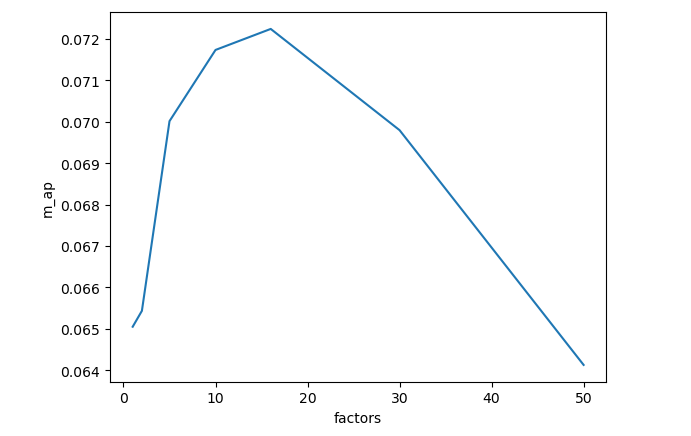
переобучение...

### Item to item

Зная, кто покупает товары, хотим посчитать "похожесть" между товарами. То есть, каждый товар мы сравним с другими и поймём, насколько часто их покупают вместе, как часто они пересекаются в чеках. Для каждого товара составим "топ товаров, которые на него похожи".

"Похожесть" замеряем косинусным расстоянием

Ещё один гиперпараметр - количество товаров, которые мы храним для каждой единицы (пока определим K=200)

Используя ненормированную функцию make_coo_row, получим:

    Результат по метрике - 0.0929

    Скорость - 2273.06it/s

Добавим нормировку:

    Результат по метрике - 0.1151

    Скорость -  2154.10it/s

Вывод - в случае косинусного расстояния такая нормировка только улучшает ситуацию

#### Проверим зависимость от K

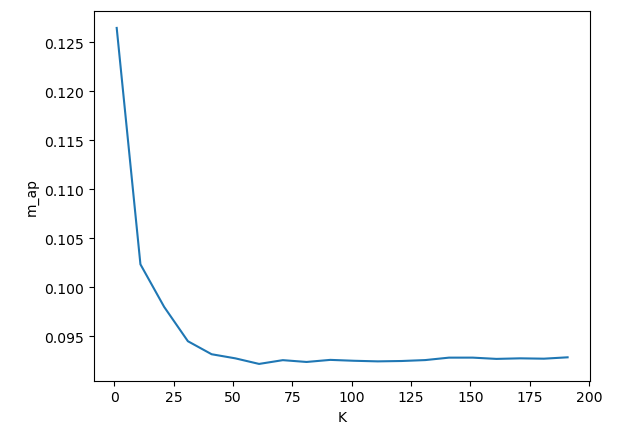
Такова уж особенность текущих данных - но такой вывод не слишком удачен для магазина (пользователь не будет покупать новые товары). Нужно искать баланс.

### User to user

Будем так же мерять "похожесть", но на этот раз не по столбцам, а по строкам. Для текущего пользователя ищем похожим на него и предлагаем то, что покупали они

В этот раз использую SVD разложение матрицы - <code>[Крутое математическое объяснение](https://youtu.be/7YZZ-CJRWBI?t=518)
</code>

Сжимаем наше пространство в 40к компонент до 128:

    svd = TruncatedSVD(n_components=128)

Берём историю пользователя, составляем из неё привычную строку, сжимаем до 128 компонент и смотрим KNN на 256 соседей.


У похожих пользователей суммируем их покупки и считаем, что "чем больше они покупали, тем выгоднее товар". В качестве рекомендации возвращаем топ 30 таких товаров

In [ ]:
m_ap = []
for js in tqdm(valid_data):
    row_sparse = make_coo_row(js["transaction_history"], product_encoder)
    row_dense = svd.transform(row_sparse)
    knn_result = knn.kneighbors(row_dense, n_neighbors=num_neighbours)
    neighbors = knn_result[1]
    scores = np.asarray(X_stored[neighbors[0]].sum(axis=0)[0]).flatten()
    top_indices = np.argsort(-scores)
    recommended_items = product_encoder.toPid(top_indices[:30])
    gt_items = js["target"][0]["product_ids"]
    m_ap.append(normalized_average_precision(gt_items, recommended_items, k=30))
print(np.mean(m_ap))

Итог:

    Результат по метрике - 0.0936

    Скорость -  8.79it/s
    
результат неплох, но скорость неприлично маленькая

Чтобы успорить этот метод, используем фейсбуковский Faiss

### FAISS

библиотека, которая позволяет быстро искать соседей. 

    index = faiss.index_factory(128, "IVF256,PQ32", faiss.METRIC_INNER_PRODUCT)

тут
* 128 - размерность вектора, который будет использоваться
* `faiss.METRIC_INNER_PRODUCT` - метрика
* `"IVF256,PQ32"` - [Индексы в faiss](https://github.com/facebookresearch/faiss/wiki/Faiss-indexes)

говорим, как строить индекс и как сжимать вектора
- `IVF256` - индекс на 256 кластеров, каждая точка приписывается к определённому кластеру. Когда придёт новая точка считается расстояние до 256 точек сначала (до центров кластеров), а потом уже внутри кластера  
- `PQ32` - сжатие вектора с потерей качества. 32 - кол-во бит

Итог:

    Результат по метрике - 0.0845

    Скорость -  98.55it/s
    
Качество немного упало, но скорость стала сильно лучше. Однако, можно немного поднять качество, задав параметр 

    nprobe = 32
    
который указывает количество кластеров, которые мы идём проверять

Итог:

    Результат по метрике - 0.0861

    Скорость -  94.63it/s